# Examen parcial 3 v2. (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 11.00am del 06.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

Masa de una barra delgada en el intervalo [a, b] es dada por Integral:

$$ m =  \int_{a}^{b} \rho (x) \ dx $$

donde $\rho(x)$ es una función de densidad linear

<table><tr>
<td> <img src="rod.jpg" width="300" /> </td>
</tr></table>   


El archivo $\textbf{data_distance_density.csv}$ contiene dos columnas: la distancia un la barra ($ x $) y la densidad ($ \rho (x) $) de la barra como función del distancia.

* a) importar los datos usando pandas, graficar la densidad de la barra $\rho(x)$ vs $x$ (los gráficos deben tener etiquetas para el eje x y el eje y).

* b) calcular la masa de la barra mediante integración numérica

In [12]:
#from google.colab import drive #Lo primero es acceder a drive puesto que ahi tengo el archivo csv
import pandas as pd
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_distance_density.csv') 
df=pd.read_csv('data_distance_density.csv') 

df.head()

,distance,density
0,1.570796,1.000000
1,1.586663,0.999874
2,1.602530,0.999497
3,1.618396,0.998867
4,1.634263,0.997987


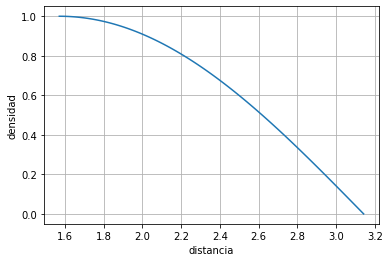

In [13]:
import numpy as np
df_np=df.to_numpy()   # pasamos los datos de los pixeles y los de la etiqueta a un array de numpy
import matplotlib.pyplot as plt
distance=[df_np[x][0] for x in range(len(df_np))]#asignamos los datos a listas
density=[df_np[x][1] for x in range(len(df_np))]
plt.plot(distance,density)
plt.xlabel("distancia")
plt.ylabel("densidad")
plt.grid()
plt.show()

In [14]:
from scipy.integrate import trapz
y=[]
for i in range(len(df['distance'])):
  y.append(df['density'][i]*df['distance'][i])
I=trapz(y,df['distance'])
print("La masa es:",I)

La masa es: 2.14150576590951


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando Pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica y hace un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* d) encontrar Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [15]:
df2=pd.read_csv('data_pressure_vs_temparature.csv') 
df2.head()

,Temperature,Pressure
0,4.789201e-08,1.958251e-17
1,6.625061e-08,2.055515e-17
2,8.460922e-08,2.237848e-17
3,1.029678e-07,2.534132e-17
4,1.213264e-07,2.994527e-17


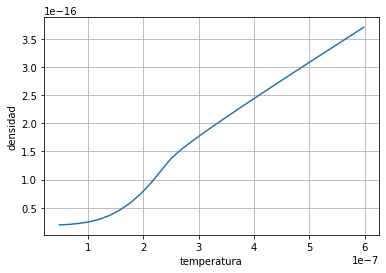

In [16]:
import numpy as np
df2_np=df2.to_numpy()   # pasamos los datos de los pixeles y los de la etiqueta a un array de numpy
import matplotlib.pyplot as plt
temperatura=[df2_np[x][0] for x in range(len(df2_np))]#asignamos los datos a listas
presion=[df2_np[x][1] for x in range(len(df2_np))]
plt.plot(temperatura,presion)
plt.xlabel("temperatura")
plt.ylabel("densidad")
plt.grid()
plt.show()

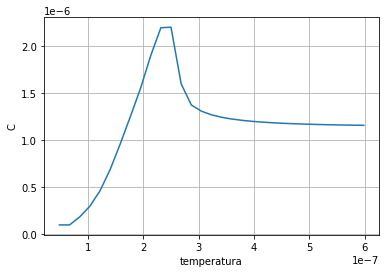

In [17]:
c=[]
h=0.00000000001
for i in range(len(presion)):
  if i==0:
    c.append(((presion[i+1]-presion[i])/h))
  else:
    c.append(((presion[i]-presion[i-1])/h))

plt.plot(temperatura,c)
plt.xlabel("temperatura")
plt.ylabel("C")
plt.grid()
plt.show()

In [18]:
"La temeperarura critica es 2.5"

'La temeperarura critica es 2.5'

# Ejercicio 3.

Grafica la función:

$$ F_{a, b} = \int_0 ^{10} sin (ax) + cos (bx^ 2) \ \ dx $$

donde $ a $ es solo un número:

`a = 1`

y $ b $ es una numpy arrray, digamos:
 
`b = np.linspace (0,1,101)`

El gráfico deben tener etiquetas para eje `x` y eje `y`. 

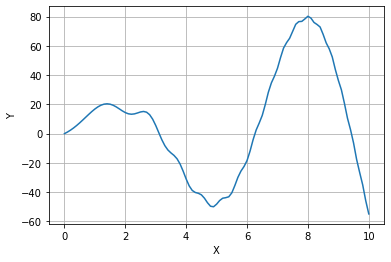

In [19]:
import scipy
a=1
b = np.linspace (0,1,101)
x= np.linspace (0,10,101)
def integr(x):
  return np.sin(a*x)+np.cos(b*(x**2))
y=[]
for i in range(len(x)):
  y.append(integr(x[i])*x[i])
  I=trapz(y,x)
plt.plot(x,I)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

## Ejercicio 4. Algebra linear.
#### Introducion:

En varios casos, sistema de equaciones diferentiales lineares
tipo 
$$\frac{d\textbf{x}}{dt}=\textbf{A}\textbf{x}$$
con solucion:
$$ \textbf{x}(t) = e^{t\textbf{A}} \textbf{C}$$

(donde $\textbf{x}$ es un vector, $\textbf{A}$ es matrix y $\textbf{C}$ es vector de condiciones iniciales)

se simplifica a calcular exponente de matriz: $e^{\textbf{A}t}$!!!!

$\textbf{Como ejercicio, calcule $e^{A}$}$ definido como:

$$e^A=Pe^DP^{-1}$$

donde $e^D$ es

$$e^D=
\begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & e^{\lambda_n} \\
\end{bmatrix}
$$

$P$ son eigenvectors y $P^{-1}$ es inversion de $P$

* a) Construye una function $\textbf{matrix_exp(A)}$ que acepta una matrix A como un argumento
* b) si matrix no es cuadrada: imprime "Matrix must be square" y sale la funcion usando: $\textbf{return}$
* c) si matrix es cuadrada ($\textbf{else:}$): calcule y imprime valor de $e^A$
* para verificar su resultado uno puede usar scipy.linalg.expm(A)

In [20]:
from scipy.linalg import expm
A=[[1,2,3],[2,3,1],[3,2,1]]
expm(A)

array([[131.55010207, 160.28420467, 111.59448675],
       [130.55378461, 163.00248649, 109.87252239],
       [131.41476679, 160.28420467, 111.72982204]])

In [21]:
def matrix_exp(A):
  if len(A)!=len(A[0]):
    return "La matriz debe ser cuadrada"
  else:
    evalues, evectors = np.linalg.eig(A)
    P=evectors
    Pinv=np.linalg.inv(P)
    e_A=np.zeros(np.shape(A))
    for i in range(len(A)):
      e_A[i,i] = np.exp(evalues[i])
    return np.matmul(P,np.matmul(e_A,Pinv))

In [22]:
matrix_exp(A)

array([[131.55010207, 160.28420467, 111.59448675],
       [130.55378461, 163.00248649, 109.87252239],
       [131.41476679, 160.28420467, 111.72982204]])

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 2.5p):	0.5p
* el resultado es incorecto

Exercise 2.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 3.
Solution + presentation of the results	            (max 2.5p):	0.5p
* el resultado es incorecto

Exercise 4 
Solution + presentation of the results	            (max 2.5p):	2.5p




- Total:                                              (max 10.0p):   6.0p
```